### Student Information
Name: Zhang Zhuqing

Student ID: t14902204

GitHub ID: shinshin512

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main xercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Data Preparation

### 1.1. Load Data

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read data file and store it in df
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

### 1.2. Split train and test df

In [23]:
# split into train and test df
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# reindex since the train_test_split randomly choose the data, causing unorganized index
df_train.reset_index(inplace=True, drop=True)

Focusing on only train data for now

### 1.3. Data Exploration

In [24]:
# observe data
df_train.head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-12 2:38:39,mmo7i6j,wallstreetbets,Retail giant TARGET has now declined for 10 co...,DaimonHans,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,10 consecutive weeks _so far_,1.000000,0.100000,1.0,['far_'],0.0
1,comment,2025-04-11 12:58:20,mmk0kwi,StockMarket,$ U.S. dollar value (crashing),blufin,https://i.redd.it/atvlo83gk4ue1.jpeg,1,NaN,NaN,"US Treasuries were the safe haven, but now eve...",0.728571,-0.195238,-1.0,"['reason', 'behaviour', 'one', 'the orange mes...",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,comment,2025-04-11 9:02:58,mmj7m0q,StockMarket,🚨China responds to Trump’s 145% tariff with an...,hypocrisy-identifier,https://i.redd.it/2f7y4h6226ue1.jpeg,1,NaN,NaN,Really good one!!,0.600000,1.000000,1.0,[],1.0
4,comment,2025-04-11 17:17:49,mmlfnzp,wallstreetbets,Retardation is on the menu boys! WSB is so back,Roddykins1,https://i.redd.it/0yq2ftren8ue1.jpeg,12,NaN,NaN,Something about it always made me giggle.,0.000000,0.000000,0.0,['giggle'],0.0


In [25]:
df_train.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [26]:
df_train.shape

(677, 16)

In [32]:
# print out the text data for the first three samples in the dataset
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(df_train.text[i].split("\n")))

example 1
10 consecutive weeks _so far_
example 2
US Treasuries were the safe haven, but now everyone's shifting to gold instead. A recession is coming, tariffs are coming, an unpredictable political situation with possible autocracy and the arbitrary behaviour that produces is coming. We've seen the rule of law breaking down with the regime basically doing what they want without consequence. No one wants to have any assets in the US when they decide to start confiscating them for insulting the orange messiah or whatever crazy reason they come up with.
example 3
Seeing lots of red in the ticker.


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

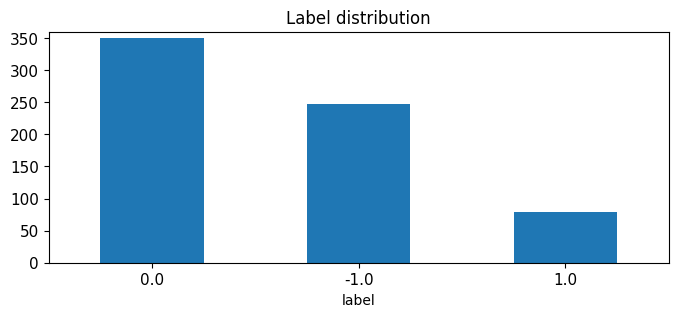

In [27]:
import matplotlib.pyplot as plt

# observe the distribution of label column
df_train.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 360],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

## 2. Data Transformation

### 2.1. Feature Selection

1. Essential columns
- text – the raw text of the post/comment. This is your main input for text mining.
- label – the target variable you want to predict (1.0, 0.0, -1.0).

2. Optional but helpful columns - **future enhancements**
- title – sometimes adds extra context to the post. You can combine it with text.
- subjectivity & polarity – precomputed sentiment features; can boost model performance without extra text processing.
- upvotes, downvotes, upvote_ratio – may give context about how others perceive the post.
- type – comment vs post; occasionally useful for patterns in sentiment.

3. Columns you can safely ignore
- datetime (unless doing temporal analysis)
- post_id, url (unique identifiers, not predictive)
- subreddit, author (can be useful if you want extra features, but optional)
- entities (only if you want named-entity info; not strictly necessary for basic sentiment prediction)

In [73]:
# filter to only essential columns
X = df_train[['text', 'label']]

### 2.2. Familiarizing with the Data

In [74]:
# display the top 5 of X
X.head(5)

,text,label
0,10 consecutive weeks _so far_,0.0
1,"US Treasuries were the safe haven, but now eve...",0.0
2,Seeing lots of red in the ticker.,0.0
3,Really good one!!,1.0
4,Something about it always made me giggle.,0.0


In [48]:
# Display only the first ten records of text column
X.loc[:10, 'text']

0                         10 consecutive weeks _so far_
1     US Treasuries were the safe haven, but now eve...
2                     Seeing lots of red in the ticker.
3                                     Really good one!!
4             Something about it always made me giggle.
5     Poor slave, thinking they're free and democrat...
6     Calling it anything but a trade embargo at thi...
7     $GE rose today on drone news. Here's the daily...
8                                 [ Removed by Reddit ]
9     I bet he is about to impose more tariffs somew...
10    So countries “begging to stop the tariffs” and...
Name: text, dtype: object

In [49]:
# Display only the top 5 text column with label of 1.0
X[X['label']==1.0].head(5)

,text,label
3,Really good one!!,1.0
10,So countries “begging to stop the tariffs” and...,1.0
25,Now this is some wholesome stuff more companie...,1.0
27,Hey I have just done this. I have used 25 stoc...,1.0
31,"OK, let me kick this off:\n\nLong (large expos...",1.0


## 3. Data Mining using Pandas

### 3.1. Missing Values

In [75]:
# check for null
X.isnull().sum()

text     0
label    0
dtype: int64

### 3.2. Duplicated Values

In [76]:
# check for duplicate
sum(X.duplicated())

20

In [77]:
# remove all duplicates, keeping only the uniques
X_cleaned = X.drop_duplicates(keep=False).reset_index(drop=True)

### 3.3. Remove URLs

In [85]:
# Remove URLs (if any)

X_cleaned['cleaned_text'] = X_cleaned['text'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

Some cleaning such as removing whitespaces or lowercase the text will be done in CounterVectorizer anyways

### 3.4. Replace underscore with a whitespace

In [96]:
X_cleaned['cleaned_text'] = X_cleaned['cleaned_text'].str.replace('_', ' ')

### 3.5. Remove unnecessary punctuations

In [97]:
X_cleaned['cleaned_text'] = X_cleaned['cleaned_text'].str.replace(r"[^\w\s!?']", '', regex=True)

## 4. Data Preprocessing

### 4.1. Feature subset selection


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

# only training data
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_cleaned.cleaned_text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(2))	1
  (np.int32(0), np.int32(754))	1
  (np.int32(0), np.int32(3567))	1
  (np.int32(0), np.int32(3004))	1
  (np.int32(0), np.int32(1235))	1


Some examples of what each feature is based on their index in the vector:

In [99]:
count_vect.get_feature_names_out()[443]

'bitb'

In [100]:
count_vect.get_feature_names_out()[0:10]

array(['01378hk', '01728', '10', '100', '10000', '100027', '100k', '100x',
       '101000', '1050'], dtype=object)

In [101]:
analyze = count_vect.build_analyzer()
analyze(X_cleaned.cleaned_text[0])

['10', 'consecutive', 'weeks', 'so', 'far']

In [108]:
# convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [107]:
# Answer here
normal_arr = X_counts[4, 0:100].toarray() # store the array in a variable
 
for i in range(0, len(normal_arr[0])):
    # find any tokens exist in the document
    if normal_arr[0][i] == 1:
        print(f"The {i}th word is {count_vect.get_feature_names_out()[i:i+1]}")

#### Heatmap of Words 

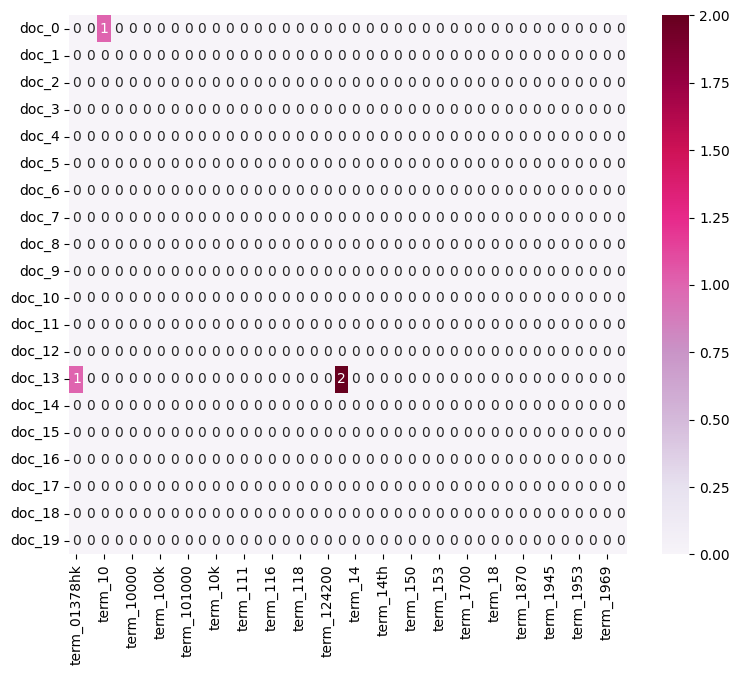

In [110]:
# first 20 features only, observe only first 40 words
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:40]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

plot_z = X_counts[0:20, 0:40].toarray() #X_counts [how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True) 


### 4.2. Attribute Transformation / Aggregation

####  4.2.1 Transform Text Data

In [111]:
import numpy as np

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [112]:
#sum of first term
term_frequencies[0]

np.int64(1)

/var/folders/9t/xy7s3r594gj6ndzrbtkh749c0000gn/T/ipykernel_3482/726419715.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:150], rotation = 90);


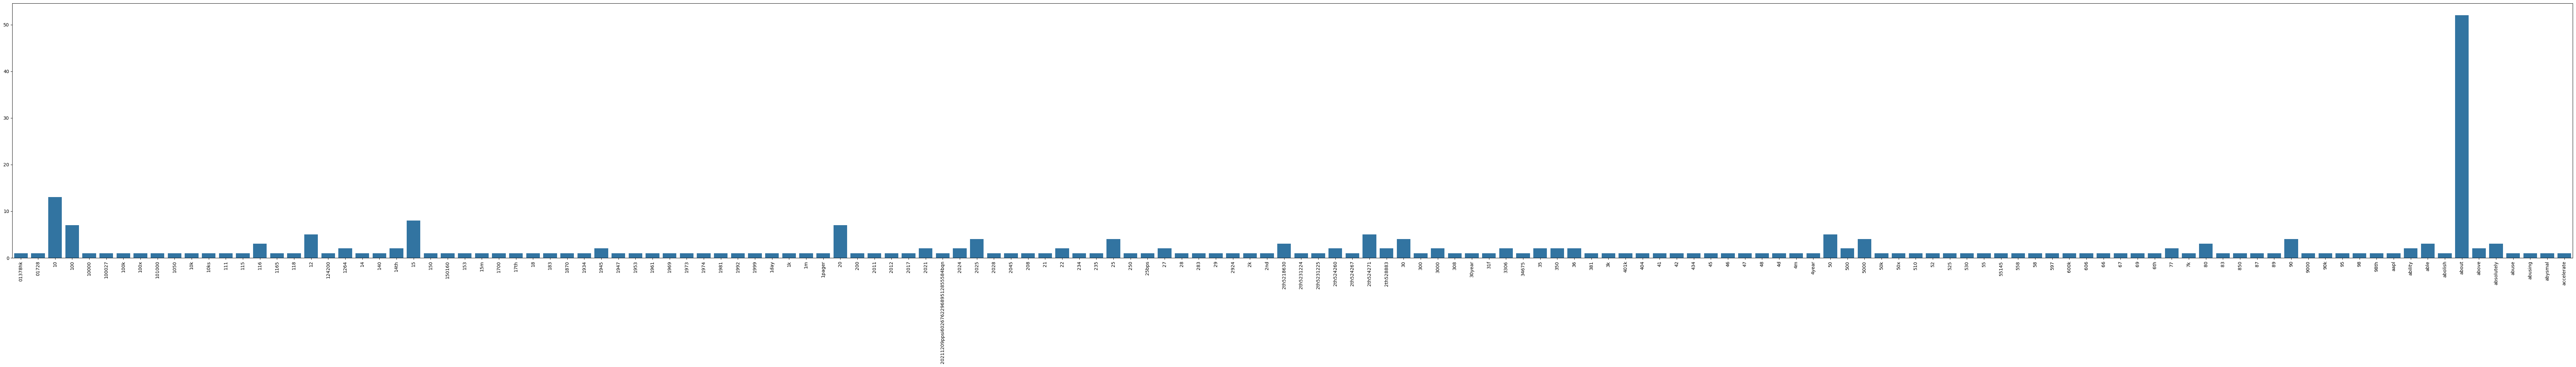

In [117]:
# plot the frequencies of the first 150 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:150], 
            y=term_frequencies[:150])
g.set_xticklabels(count_vect.get_feature_names_out()[:150], rotation = 90);

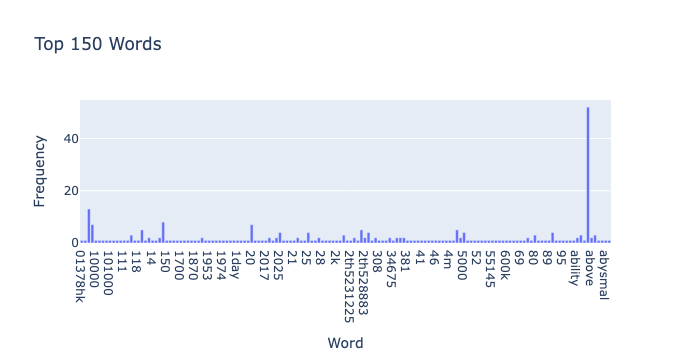

In [120]:
# plot the frequencies of the first 150 terms by plotly
import plotly.express as px

words = count_vect.get_feature_names_out()[:150]
counts = term_frequencies[:150]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 150 Words')
fig.show()


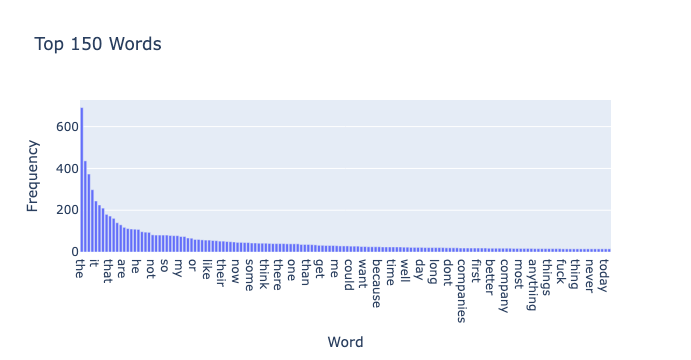

In [122]:
# observe only top 150 frequently used words
import plotly.express as px

idx = term_frequencies.argsort()[::-1][:150]
words = count_vect.get_feature_names_out()[idx]
counts = term_frequencies[idx]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 150 Words')

fig.show()

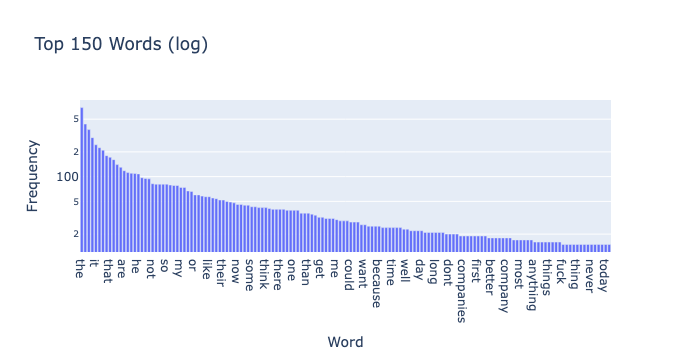

In [123]:
# display the frequency of terms in form of log
import plotly.express as px

idx = term_frequencies.argsort()[::-1][:150]
words = count_vect.get_feature_names_out()[idx]
counts = term_frequencies[idx]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 150 Words (log)')

fig.update_yaxes(type="log")

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here